/tmp/ipykernel_3495522/1893031173.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd



--- Processing model: RNN ---
[0.9033571481704712, 0.9042857110500335, 0.9044285694758097, 0.9029464274644852, 0.900685715675354, 0.8956785698731741, 0.8851326516696385, 0.8670267850160599, 0.8476507941881816, 0.828407143354416, 0.810435065356168]

--- Processing model: CNN ---
[0.9019285798072815, 0.9011785745620727, 0.8993571440378826, 0.8974821448326111, 0.8961714291572571, 0.8947023828824361, 0.888724490574428, 0.8727678582072258, 0.8536428570747376, 0.8351785707473756, 0.8179545445875689]

--- Processing model: LSTM ---
[0.9134285807609558, 0.9130357146263122, 0.9119761904080708, 0.9111071437597273, 0.9106142878532408, 0.9096309542655944, 0.9046938793999807, 0.8941339299082756, 0.8802936527464125, 0.8659285724163055, 0.8521233786236156]

--- Processing model: NCP ---
[0.9058571457862854, 0.9078928589820862, 0.9088333368301392, 0.9056071460247039, 0.8983571434020996, 0.87880952556928, 0.8545204094478063, 0.8321696415543557, 0.8121666643354629, 0.7939142835140229, 0.777025971629402

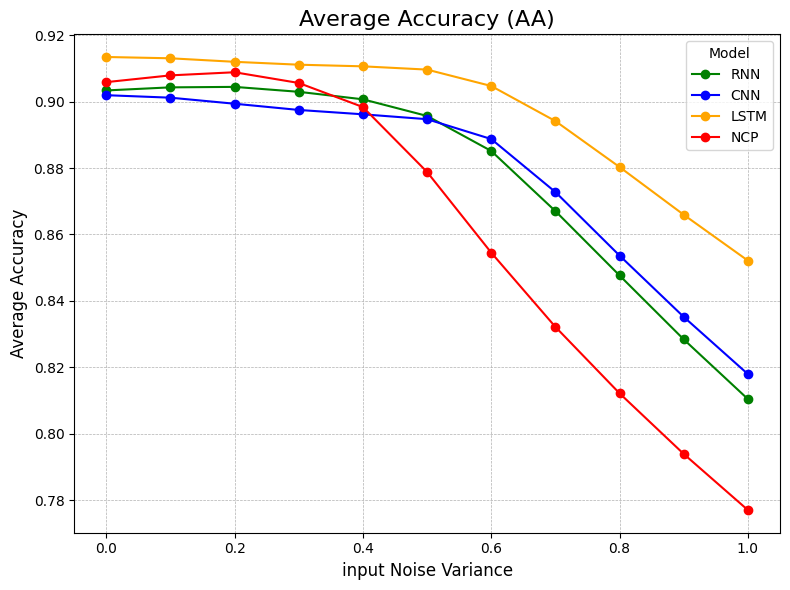

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# === 設定 ===
seeds = [1, 2, 3, 4, 5]
models_to_process = ["RNN", "CNN", "LSTM", "NCP"]

csv_baseline_base = "/work/csv/uci-har/dil-noise/none"

color_palette = {
    "CNN": "blue",
    "RNN": "green",
    "LSTM": "orange",
    "NCP": "red"
}

# === プロット用データ格納 ===
plt.figure(figsize=(8, 6))

for model_name in models_to_process:
    print(f"\n--- Processing model: {model_name} ---")
    all_dfs = []

    for seed in seeds:
        if model_name == "NCP":
            file_path = os.path.join(csv_baseline_base, "ncp", f"seed{seed}_baseline_new.csv")
        else:
            file_path = os.path.join(csv_baseline_base, model_name.lower(), f"seed{seed}_baseline.csv")

        if not os.path.exists(file_path):
            print(f"⚠️ ファイルが見つかりません: {file_path}")
            continue

        df = pd.read_csv(file_path)

        # noise_level と Test Acc を抽出
        df = df[['noise_level', 'テスト精度 (Test Acc)']]

        all_dfs.append(df)

    if not all_dfs:
        continue

    # --- seedごとの平均 ---
    merged_df = pd.concat(all_dfs)
    grouped = merged_df.groupby("noise_level").mean().reset_index()

    noise_levels = grouped["noise_level"].tolist()
    accs = grouped["テスト精度 (Test Acc)"].tolist()
    aa_accs=[]
    sum=0
    for i in range(len(accs)):
        sum += accs[i]
        aa_accs.append(sum/(i+1))
    print(aa_accs)

    plt.plot(noise_levels, aa_accs, label=model_name, color=color_palette[model_name], marker="o")

# === グラフの装飾 ===
plt.xlabel("input Noise Variance",fontsize=12)
plt.ylabel("Average Accuracy",fontsize=12)
plt.title("Average Accuracy (AA)",fontsize=16)
plt.legend()
plt.grid(True, linestyle="--", linewidth=0.5)
plt.legend(title="Model")
plt.tight_layout()
plt.show()
